In [1]:
print 'hello'

hello


In [66]:
import os
import pickle
import numpy as np
import scipy

In [39]:
def load_cifar(filename):
    with open(filename, 'rb') as f:
        datadict = pickle.load(f)
        
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).astype(np.uint8)
        Y = np.array(Y, dtype=np.int64)
        return X, Y

In [40]:
save_dir = '/mnt/D/Learning/MTSS/Sem 4/code/designing-neural-networks/data/cifar10'
root = os.path.join(save_dir, "cifar-10-batches-py")

# Training Data
xs = []
ys = []
for b in range(1, 6):
    f = os.path.join(root, 'data_batch_%d' % (b,))
    x, y = load_cifar(f)
    xs.append(x)
    ys.append(y)
x_train = np.concatenate(xs)
y_train = np.concatenate(ys)

# Testing data
x_test, y_test = load_cifar(os.path.join(root, 'test_batch'))

In [45]:
x_train[:1].shape

(1, 3, 32, 32)

['data', 'labels', 'batch_label', 'filenames']
<type 'dict'>
<type 'numpy.ndarray'>
(32, 32, 3)


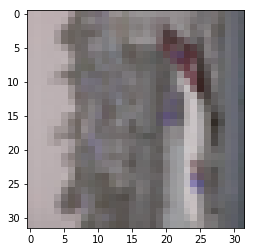

6


In [97]:
f = '/mnt/D/Learning/MTSS/Sem 4/code/designing-neural-networks/data/cifar10/cifar-10-batches-py/data_batch_4'
with open(f, 'rb') as fl:
    datadict = pickle.load(fl)
    print datadict.keys()
    print type(datadict)
    print type(datadict['data'])
    dt = datadict['data'].astype(np.float32)
    Y = datadict['labels']
    Y = np.array(Y, dtype=np.int64)
    
    dt = dt.reshape(10000, 3, 32, 32)
    
    data_point = dt[:1][0]
    dp_val = Y[1]
    
    data_point = data_point.transpose()
#     data_point = np.ascontiguousarray(data_point.transpose())
    
    print data_point.shape
   
#     from PIL import Image
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    
#     img = Image.fromarray(data_point, 'RGB')
#     img.save('out.png')
    
#     img = mpimg.imread('out.png')
#     plt.imshow(img)
#     plt.show()

    import cv2
    
    
    cv2.imwrite('out.png', data_point)
    
    
    img = mpimg.imread('out.png')
    plt.imshow(img)
    plt.show()
    
    print dp_val

In [ ]:
def load_mnist(image_fname, label_fname):
    with open(image_fname, "rb") as image_file, open(label_fname, "rb") as label_file:
        assert (get_int(image_file) == 2051)
        assert (get_int(label_file) == 2049)

        n_items_label = get_int(label_file)
        n_items = get_int(image_file)
        assert (n_items_label == n_items)
        assert (get_int(image_file) == 28)
        assert (get_int(image_file) == 28)

        Y = []
        X = np.zeros((n_items, 28, 28, 1), dtype=np.uint8)
        print "Reading [%d] items" % n_items
        for i in range(n_items):
            label = get_byte(label_file)
            assert (label <= 9)
            assert (label >= 0)
            Y.append(label)
            X[i, :] = get_image(image_file)
    return X, np.asarray(Y)

In [98]:
def get_byte(file_in):
    int_out = ord(file_in.read(1))
    return int_out


def get_int(file_in):
    int_out = struct.unpack('>i', file_in.read(4))[0]
    return int_out


def get_image(file_in, row=28, col=28):
    raw_data = file_in.read(row * col)
    out_image = np.frombuffer(raw_data, np.uint8)
    out_image = out_image.reshape((28, 28))
    return out_image

In [103]:
train_dataset = '/mnt/D/Learning/MTSS/Sem 4/code/designing-neural-networks/data/mnist/train-images-idx3-ubyte'
test_dataset = '/mnt/D/Learning/MTSS/Sem 4/code/designing-neural-networks/data/mnist/train-labels-idx1-ubyte'

import struct



with open(train_dataset, "rb") as image_file, open(test_dataset, "rb") as label_file:
    n_items_label = get_int(label_file)
    n_items = get_int(image_file)

    Y = []
    X = np.zeros((n_items, 28, 28, 1), dtype=np.uint8)
    print "Reading [%d] items" % n_items
    for i in range(n_items):
        label = get_byte(label_file)
        Y.append(label)
        X[i, :] = get_image(image_file)

    print X.shape

Reading [2051] items


ValueError: could not broadcast input array from shape (28,28) into shape (28,28,1)